In [1]:
import open3d as o3d
import numpy as np

def get_info_pcd(pcd : o3d.geometry.PointCloud):
    points = np.asarray(pcd.points)
    
    # Compute min max
    x_min = np.min(points[:, 0])
    x_max = np.max(points[:, 0])
    y_min = np.min(points[:, 1])
    y_max = np.max(points[:, 1])
    z_min = np.min(points[:, 2])
    z_max = np.max(points[:, 2])

    print(f"x_min: {x_min}, x_max: {x_max}")
    print(f"y_min: {y_min}, y_max: {y_max}")
    print(f"z_min: {z_min}, z_max: {z_max}")

    number_of_points = len(points)
    print(f"Number of points : {number_of_points}")
    
    return x_min, x_max, y_min, y_max, z_min, z_max, number_of_points

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Analyse des différents type de pcd

### Analyse des samples de 3DMatch

In [2]:
open3d_exemple1 = o3d.io.read_point_cloud("../data/assets/threed_match_7-scenes-redkitchen_cloud_bin_0.ply")
open3d_exemple2 = o3d.io.read_point_cloud("../data/assets/threed_match_7-scenes-redkitchen_cloud_bin_5.ply")

_ = get_info_pcd(open3d_exemple1)
print("\n")
_ = get_info_pcd(open3d_exemple2)

x_min: -1.350000023841858, x_max: 1.49399995803833
y_min: -1.4459999799728394, y_max: 0.690000057220459
z_min: 0.800000011920929, z_max: 3.49399995803833
Number of points : 258342


x_min: -1.5, x_max: 1.49399995803833
y_min: -1.1340000629425049, y_max: 0.7260000705718994
z_min: 0.8059999942779541, z_max: 3.049999952316284
Number of points : 313910


### Analyse des Scan

In [3]:
scanSample1 = o3d.io.read_point_cloud("../data/sample_piece/Scan/segment_1.ply")
scanSample2 = o3d.io.read_point_cloud("../data/sample_piece/Scan/segment_2.ply")
scanSample3 = o3d.io.read_point_cloud("../data/sample_piece/Scan/segment_3.ply")

_ = get_info_pcd(scanSample1)
print("\n")
_ = get_info_pcd(scanSample2)
print("\n")
_ = get_info_pcd(scanSample3)

x_min: -0.20434006421420342, x_max: 0.3170305396588534
y_min: -0.12480879039844672, y_max: 0.10945043545891701
z_min: -0.8934483000146033, z_max: -0.12761919207903616
Number of points : 21457


x_min: 0.3047464945079823, x_max: 0.6183340962878143
y_min: -0.13410794274331406, y_max: 0.053119421571178105
z_min: -0.5520278960636124, z_max: -0.10099402415559228
Number of points : 4419


x_min: -0.5052949773555172, x_max: -0.3413815311717865
y_min: -0.1659519121379513, y_max: 0.08330864702858835
z_min: -0.4788468657118225, z_max: -0.1367731069503052
Number of points : 3496


### Analyse des CAD

In [4]:
cadSample3 = o3d.io.read_point_cloud("../data/sample_piece/CAD/779632.ply")
cadSample2 = o3d.io.read_point_cloud("../data/sample_piece/CAD/785582.ply")
cadSample1= o3d.io.read_point_cloud("../data/sample_piece/CAD/793998.ply")

_ = get_info_pcd(cadSample1)
print("\n")
_ = get_info_pcd(cadSample2)
print("\n")
_ = get_info_pcd(cadSample3)

x_min: -236.25000000000003, x_max: 236.25000000000003
y_min: -5.683964018804471e-13, y_max: 107.00000000000001
z_min: -708.2999877929689, z_max: 18.899999618530277
Number of points : 25000


x_min: -196.1184997558594, x_max: 213.88195800781253
y_min: -143.50000000000003, y_max: 143.50000000000003
z_min: -15.457714421391234, z_max: 131.01422119140625
Number of points : 25000


x_min: -4.500000000000001, x_max: 133.50000000000003
y_min: -137.14999389648438, y_max: 136.39999389648438
z_min: -66.29100036621094, z_max: 66.29100036621094
Number of points : 25000


# Observation

- Le domaine des scans ressemble beaucoup a celui des samples de 3DMatch utilisés pour l'entrainement.  

- Le domaine des CAD est très différent. 

# Normalisation

In [5]:
def center_and_normalize_pcd(pcd: o3d.geometry.PointCloud):
    """ This function centers the point cloud and normalizes it into a unit cube while keeping the aspect ratio """
    points = np.asarray(pcd.points)
    
    # Calculate the centroid of the point cloud
    centroid = np.mean(points, axis=0)
    
    # Center the point cloud
    points -= centroid
    
    # Calculate the min and max values after centering
    x_min, y_min, z_min = np.min(points, axis=0)
    x_max, y_max, z_max = np.max(points, axis=0)
    
    # Calculate the scale factor based on the largest dimension
    max_scale = max(x_max - x_min, y_max - y_min, z_max - z_min)
    
    # Normalize the point cloud into a unit cube while keeping the aspect ratio
    points /= max_scale
    
    pcd.points = o3d.utility.Vector3dVector(points)
    
    return pcd

In [6]:
import matplotlib.pyplot as plt
import open3d as o3d
import numpy as np

def display_point_cloud(pcd: o3d.geometry.PointCloud):
    """ This function displays a point cloud using matplotlib with equal axes """
    points = np.asarray(pcd.points)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Set the aspect ratio to be equal
    max_range = np.array([points[:, 0].max() - points[:, 0].min(), 
                          points[:, 1].max() - points[:, 1].min(), 
                          points[:, 2].max() - points[:, 2].min()]).max() / 2.0

    mid_x = (points[:, 0].max() + points[:, 0].min()) * 0.5
    mid_y = (points[:, 1].max() + points[:, 1].min()) * 0.5
    mid_z = (points[:, 2].max() + points[:, 2].min()) * 0.5

    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    plt.show()
    
    
def display_point_clouds_side_by_side(source_pcd: o3d.geometry.PointCloud, target_pcd: o3d.geometry.PointCloud):
    """ This function displays two point clouds side by side using matplotlib with equal axes """
    source_points = np.asarray(source_pcd.points)
    target_points = np.asarray(target_pcd.points)
    
    fig = plt.figure(figsize=(12, 6))
    
    # Plot source point cloud
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(source_points[:, 0], source_points[:, 1], source_points[:, 2], s=1, c=[[0, 0.651, 0.929]])
    ax1.set_title('Source Point Cloud')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    # Set the aspect ratio to be equal for source point cloud
    max_range = np.array([source_points[:, 0].max() - source_points[:, 0].min(), 
                          source_points[:, 1].max() - source_points[:, 1].min(), 
                          source_points[:, 2].max() - source_points[:, 2].min()]).max() / 2.0

    mid_x = (source_points[:, 0].max() + source_points[:, 0].min()) * 0.5
    mid_y = (source_points[:, 1].max() + source_points[:, 1].min()) * 0.5
    mid_z = (source_points[:, 2].max() + source_points[:, 2].min()) * 0.5

    ax1.set_xlim(mid_x - max_range, mid_x + max_range)
    ax1.set_ylim(mid_y - max_range, mid_y + max_range)
    ax1.set_zlim(mid_z - max_range, mid_z + max_range)
    
    # Plot target point cloud
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(target_points[:, 0], target_points[:, 1], target_points[:, 2], s=1, c=[[1, 0.706, 0]])
    ax2.set_title('Target Point Cloud')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    
    # Set the aspect ratio to be equal for target point cloud
    max_range = np.array([target_points[:, 0].max() - target_points[:, 0].min(), 
                          target_points[:, 1].max() - target_points[:, 1].min(), 
                          target_points[:, 2].max() - target_points[:, 2].min()]).max() / 2.0

    mid_x = (target_points[:, 0].max() + target_points[:, 0].min()) * 0.5
    mid_y = (target_points[:, 1].max() + target_points[:, 1].min()) * 0.5
    mid_z = (target_points[:, 2].max() + target_points[:, 2].min()) * 0.5

    ax2.set_xlim(mid_x - max_range, mid_x + max_range)
    ax2.set_ylim(mid_y - max_range, mid_y + max_range)
    ax2.set_zlim(mid_z - max_range, mid_z + max_range)
    
    plt.show()

# Vizualisation du domain gap

Affichage des 3 couples scan/CAD

On peut bien voir le domain gab, l'echelle n'est pas respecté

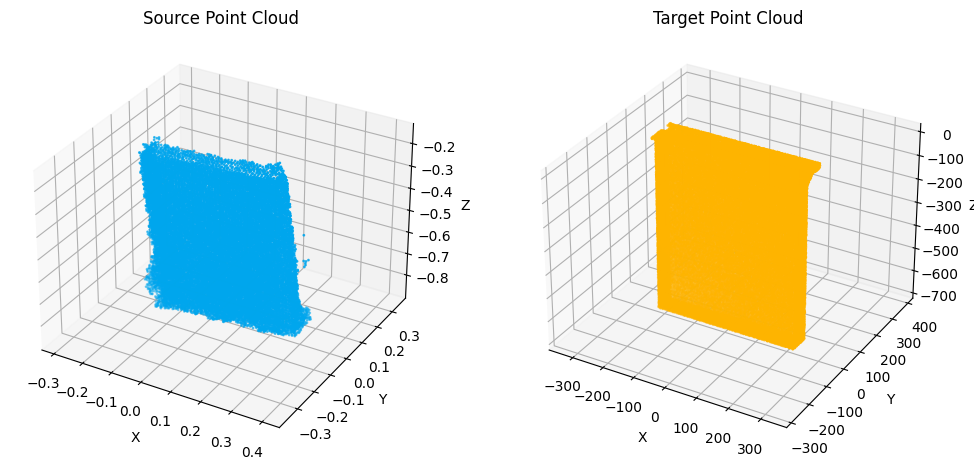

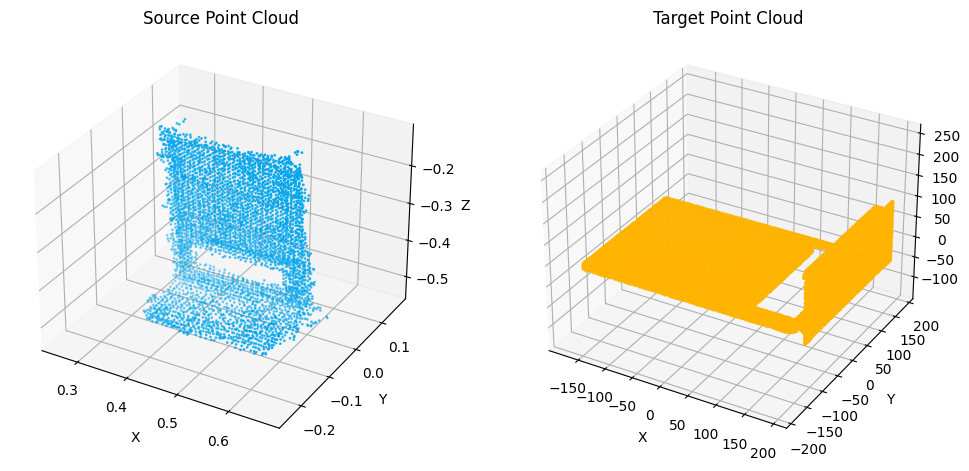

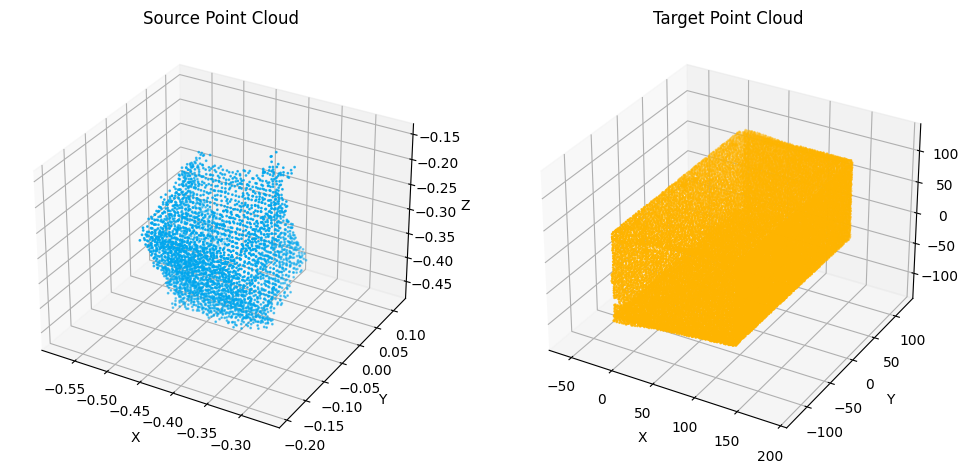

In [7]:
display_point_clouds_side_by_side(scanSample1, cadSample1)
display_point_clouds_side_by_side(scanSample2, cadSample2)
display_point_clouds_side_by_side(scanSample3, cadSample3)

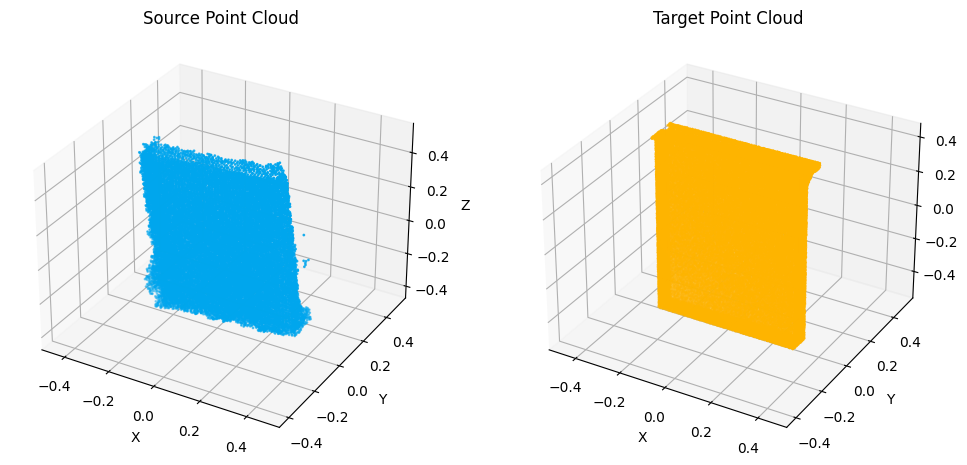

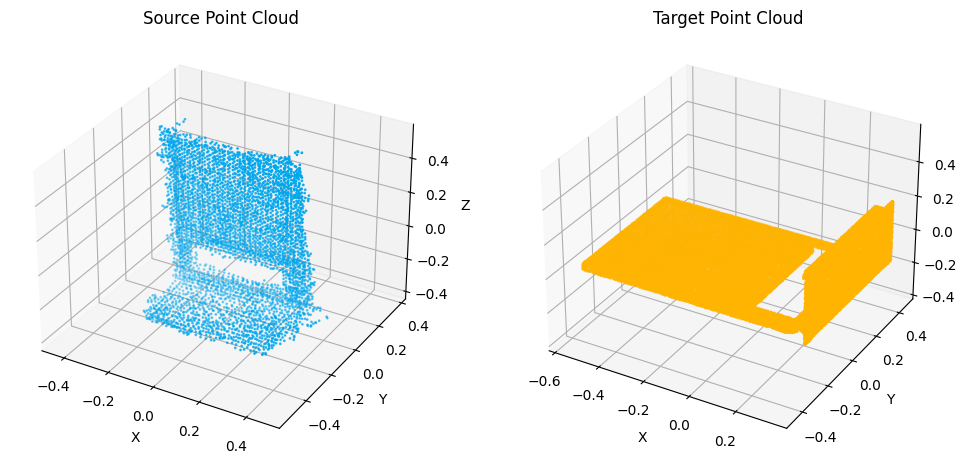

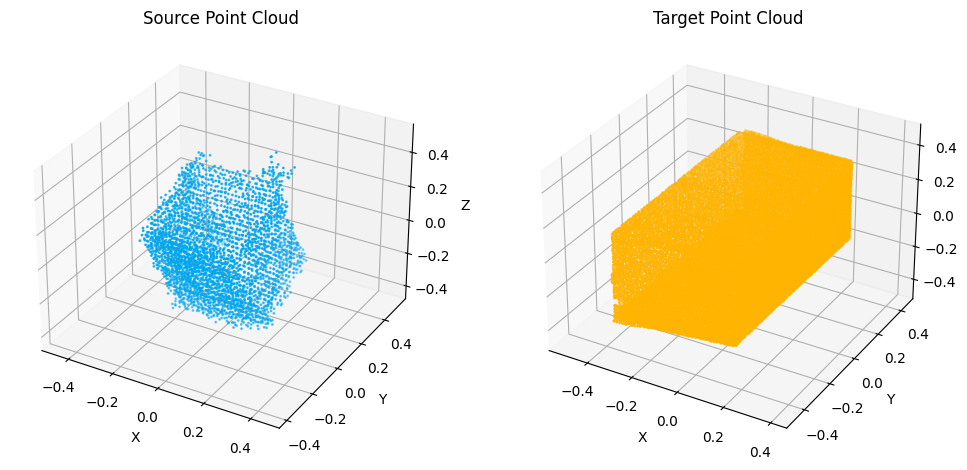

In [8]:
sources = [scanSample1, scanSample2, scanSample3]
targets = [cadSample1, cadSample2, cadSample3]

for source, target in zip(sources, targets):
    source = center_and_normalize_pcd(source)
    target = center_and_normalize_pcd(target)
    
    display_point_clouds_side_by_side(source, target)

# Matching

In [9]:
def concatenate_point_clouds(pcd0, pcd1):
    """ This function concatenates two point clouds and their color information """
    points0 = np.asarray(pcd0.points)
    colors0 = np.asarray(pcd0.colors)
    
    points1 = np.asarray(pcd1.points)
    colors1 = np.asarray(pcd1.colors)
    
    points = np.concatenate((points0, points1), axis=0)
    colors = np.concatenate((colors0, colors1), axis=0)
    
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    pcd.colors = o3d.utility.Vector3dVector(colors)
    
    return pcd

In [10]:
import os 
import numpy as np
import open3d as o3d
import sys
import os
import torch
from gedi import GeDi


def concatenate_point_clouds(pcd0, pcd1):
    """ This function concatenates two point clouds and their color information """
    points0 = np.asarray(pcd0.points)
    colors0 = np.asarray(pcd0.colors)
    
    points1 = np.asarray(pcd1.points)
    colors1 = np.asarray(pcd1.colors)
    
    points = np.concatenate((points0, points1), axis=0)
    colors = np.concatenate((colors0, colors1), axis=0)
    
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    pcd.colors = o3d.utility.Vector3dVector(colors)
    
    return pcd

def demo_code(source, target, display=True): 
    '''
    demo to show the registration between two point clouds using GeDi descriptors
    - the first visualisation shows the two point clouds in their original reference frame
    - the second visualisation show point cloud 0 transformed in the reference frame of point cloud 1
    '''

    config = {'dim': 32,                                          # descriptor output dimension
            'samples_per_batch': 500,                             # batches to process the data on GPU
            'samples_per_patch_lrf': 4000,                        # num. of point to process with LRF
            'samples_per_patch_out': 512,                         # num. of points to sample for pointnet++
            'r_lrf': .5,                                          # LRF radius
            'fchkpt_gedi_net': '../data/chkpts/3dmatch/chkpt.tar'}# path to checkpoint

    voxel_size = .01
    patches_per_pair = 5000

    # initialising class
    gedi = GeDi(config=config)

    # getting a pair of point clouds
    pcd0 = source
    pcd1 = target

    pcd0.paint_uniform_color([1, 0.706, 0])
    pcd1.paint_uniform_color([0, 0.651, 0.929])

    # estimating normals (only for visualisation)
    pcd0.estimate_normals()
    pcd1.estimate_normals()

    display_point_clouds_side_by_side(pcd0, pcd1) if display else None

    # randomly sampling some points from the point cloud
    inds0 = np.random.choice(np.asarray(pcd0.points).shape[0], patches_per_pair, replace=False)
    inds1 = np.random.choice(np.asarray(pcd1.points).shape[0], patches_per_pair, replace=False)

    pts0 = torch.tensor(np.asarray(pcd0.points)[inds0]).float()
    pts1 = torch.tensor(np.asarray(pcd1.points)[inds1]).float()

    # applying voxelisation to the point cloud
    pcd0 = pcd0.voxel_down_sample(voxel_size)
    pcd1 = pcd1.voxel_down_sample(voxel_size)

    _pcd0 = torch.tensor(np.asarray(pcd0.points)).float()
    _pcd1 = torch.tensor(np.asarray(pcd1.points)).float()

    # computing descriptors
    pcd0_desc = gedi.compute(pts=pts0, pcd=_pcd0)
    pcd1_desc = gedi.compute(pts=pts1, pcd=_pcd1)
    
    # preparing format for open3d ransac
    pcd0_dsdv = o3d.pipelines.registration.Feature()
    pcd1_dsdv = o3d.pipelines.registration.Feature()

    pcd0_dsdv.data = pcd0_desc.T
    pcd1_dsdv.data = pcd1_desc.T

    _pcd0 = o3d.geometry.PointCloud()
    _pcd0.points = o3d.utility.Vector3dVector(pts0)
    _pcd1 = o3d.geometry.PointCloud()
    _pcd1.points = o3d.utility.Vector3dVector(pts1)

    # applying ransac
    est_result = o3d.pipelines.registration.registration_ransac_based_on_feature_matching(
        _pcd0,
        _pcd1,
        pcd0_dsdv,
        pcd1_dsdv,
        mutual_filter=True,
        max_correspondence_distance=.02,
        estimation_method=o3d.pipelines.registration.TransformationEstimationPointToPoint(False),
        ransac_n=3,
        checkers=[o3d.pipelines.registration.CorrespondenceCheckerBasedOnEdgeLength(.9),
                o3d.pipelines.registration.CorrespondenceCheckerBasedOnDistance(.02)],
        criteria=o3d.pipelines.registration.RANSACConvergenceCriteria(50000, 1000))

    # applying estimated transformation
    pcd0.transform(est_result.transformation)
    
    # print("Transformation is:")
    # for row in est_result.transformation:
    #     print(row)

    display_point_clouds_side_by_side(pcd0, pcd1) if display else None
    combined_pcd = concatenate_point_clouds(pcd0, pcd1)
    
    return combined_pcd, est_result


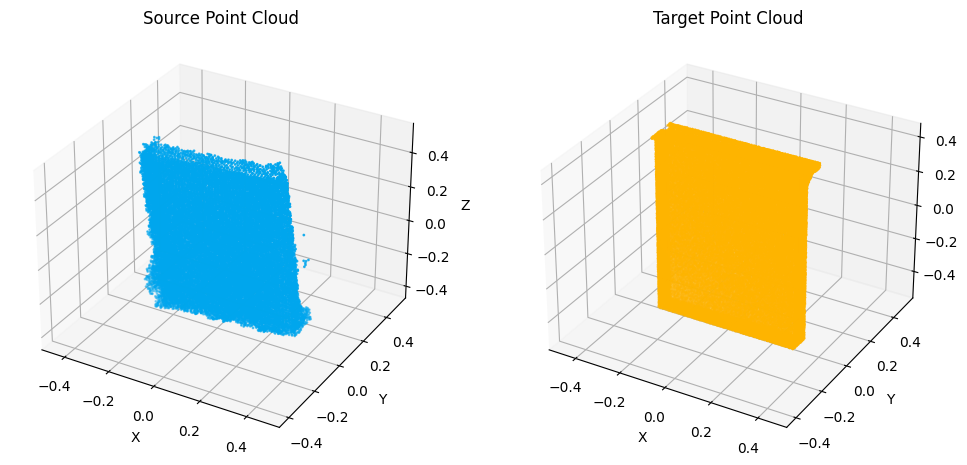

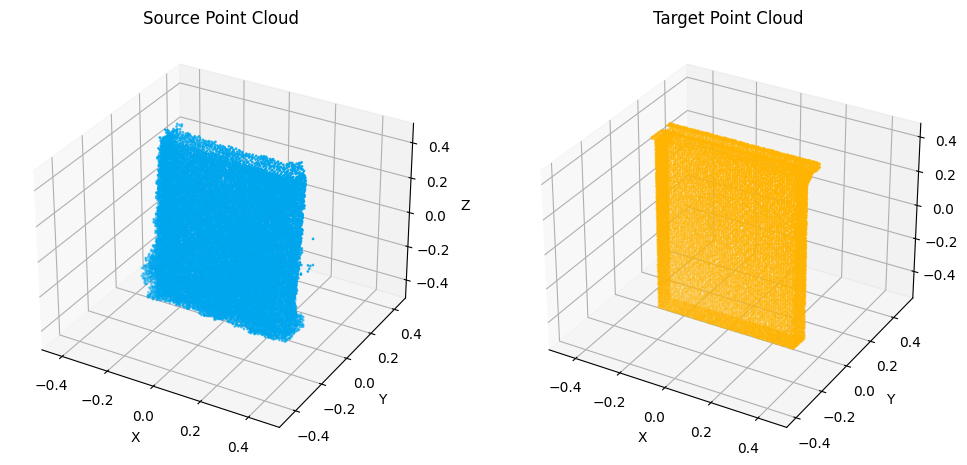

Combined point cloud saved at ../results/random_result/gedi_scan2CAD_drawer_combined.ply


In [11]:
source = scanSample1
target = cadSample1
saving_path = "../results/random_result/gedi_scan2CAD_drawer_combined.ply"

resgister_pcd, est_result = demo_code(source=source, target=target, display=True)
o3d.io.write_point_cloud(saving_path, resgister_pcd)
print(f"Combined point cloud saved at {saving_path}")

# Align the merge by camera result

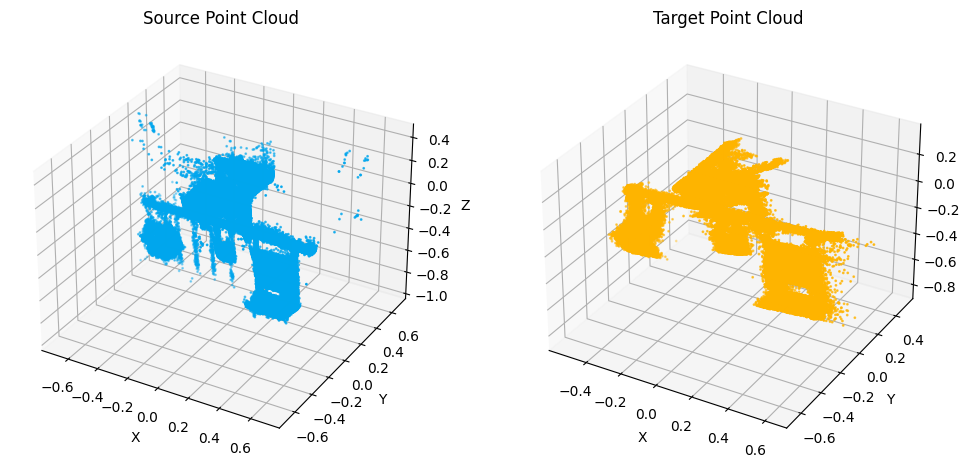

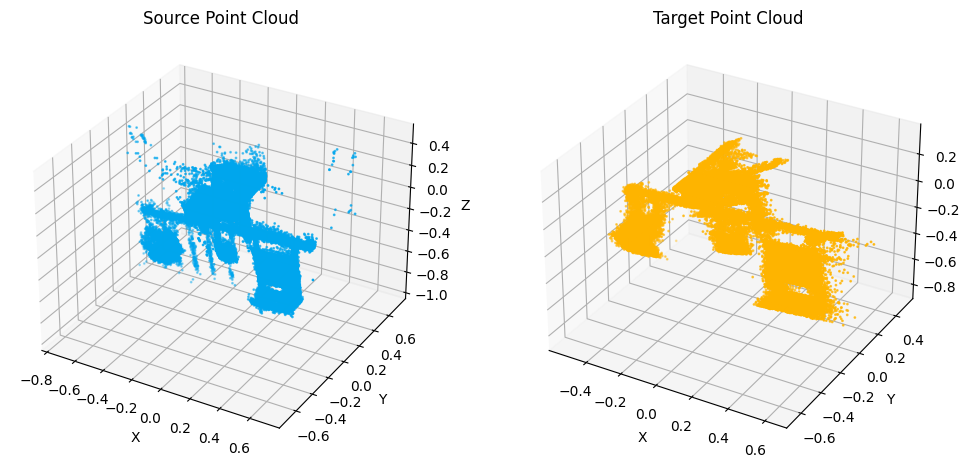

[[ 0.99544319 -0.09276149 -0.02209432 -0.02494374]
 [ 0.09191068  0.99508583 -0.03683228 -0.00216471]
 [ 0.02540236  0.03463374  0.99907719  0.01182265]
 [ 0.          0.          0.          1.        ]]
Combined point cloud saved at ../results/random_result/gedi_camera0_to_camera1.ply


In [12]:
source = o3d.io.read_point_cloud("../data/sample_by_camera/merged_by_camera0.ply")
target = o3d.io.read_point_cloud("../data/sample_by_camera/merged_by_camera1.ply")

saving_path = "../results/random_result/gedi_camera0_to_camera1.ply"

resgister_pcd, est_result = demo_code(source=source, target=target)
o3d.io.write_point_cloud(saving_path, resgister_pcd)
print(est_result.transformation)
print(f"Combined point cloud saved at {saving_path}")

result is very very impressive. 

# Try to align the raw scan without any processing

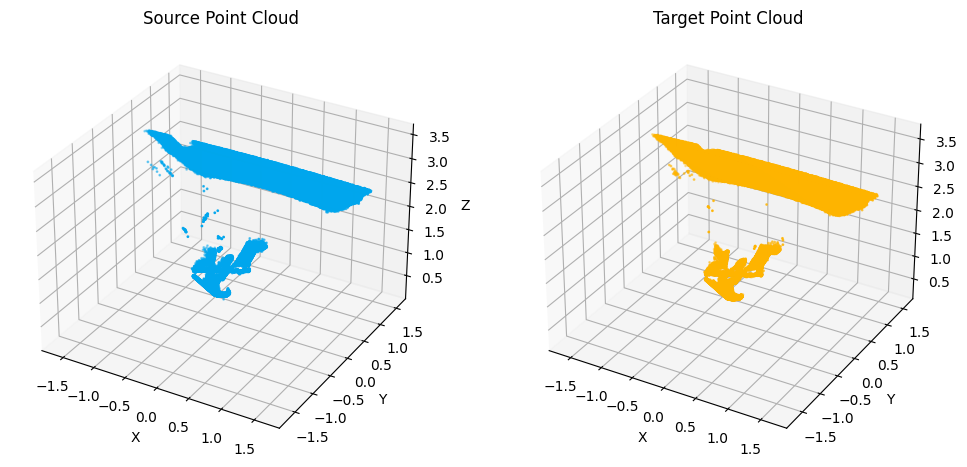

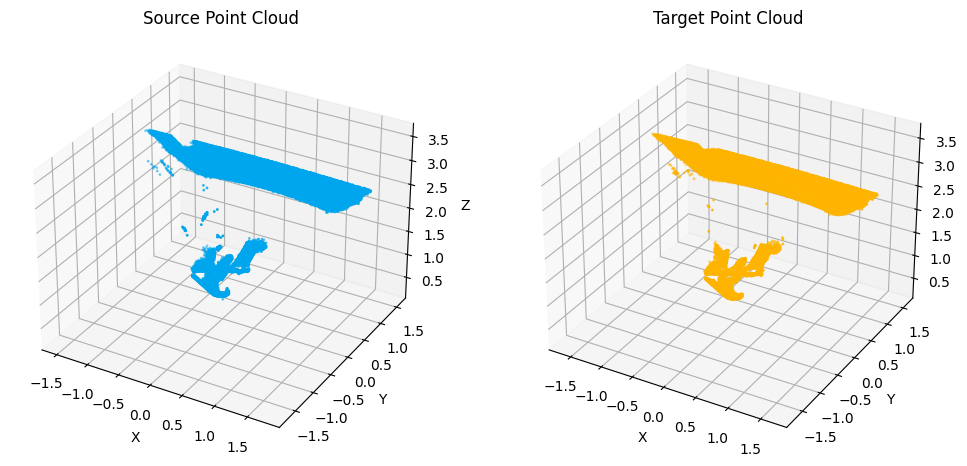

[[ 0.99997796  0.00645304 -0.00156445  0.10448828]
 [-0.00643519  0.99991705  0.01115743 -0.03740969]
 [ 0.00163632 -0.01114712  0.99993653  0.04822504]
 [ 0.          0.          0.          1.        ]]
Combined point cloud saved at ../results/random_result/gedi_scan0_scan1.ply


In [13]:
# first step, we need to align 2 of them together, without preprocessing it's a big challenge

source = o3d.io.read_point_cloud("../data/real_sequence/sequence1/camera1/scan_0.ply")
target = o3d.io.read_point_cloud("../data/real_sequence/sequence1/camera1/scan_1.ply")

saving_path = "../results/random_result/gedi_scan0_scan1.ply"

resgister_pcd, est_result = demo_code(source=source, target=target)
o3d.io.write_point_cloud(saving_path, resgister_pcd)
print(est_result.transformation)
print(f"Combined point cloud saved at {saving_path}")

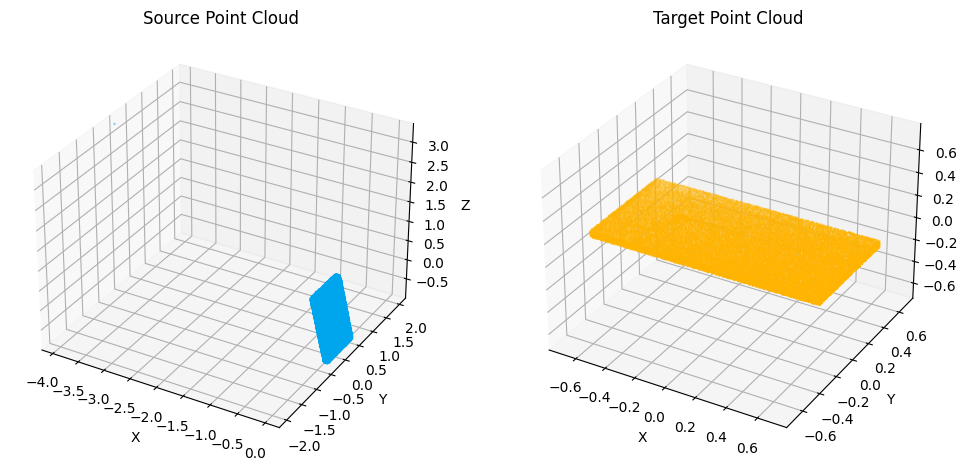

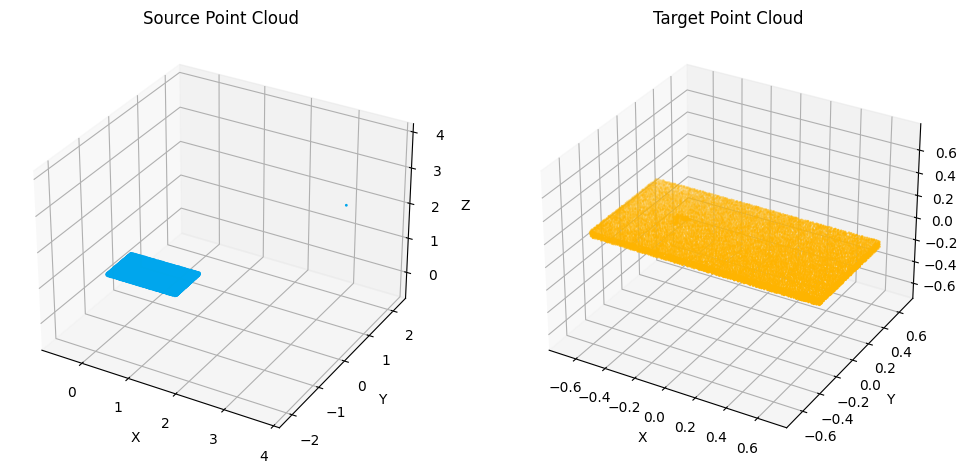

Combined point cloud saved at ../results/random_result/gedi_scan2CAD_drawer_combined.ply


In [16]:
source = o3d.io.read_point_cloud("../data/generated_SCAN_pool/pcd/766859.ply")
# source.points = o3d.utility.Vector3dVector(np.asarray(source.points) * 1000)
target = o3d.io.read_point_cloud("../data/sbi_CAD/766859.ply")
target.points = o3d.utility.Vector3dVector(np.asarray(target.points) / 1000)
saving_path = "../results/random_result/gedi_scan2CAD_drawer_combined.ply"

resgister_pcd, est_result = demo_code(source=source, target=target, display=True)
o3d.io.write_point_cloud(saving_path, resgister_pcd)
print(f"Combined point cloud saved at {saving_path}")

# Align by Camera

to align together we need to align in cascade style, so

1. scan0 register to scan1

2. concatenate register scan0 and scan1

3. ther result register to scan 2

4. ... 

In [32]:
import re

def get_next_experiment_number(folder):
    """
    Get the next experiment number by checking the existing experiment folders.
    """
    experiment_numbers = []
    for dirname in os.listdir(folder):
        match = re.match(r'exp(\d+)', dirname)
        if match:
            experiment_numbers.append(int(match.group(1)))
    if experiment_numbers:
        return max(experiment_numbers) + 1
    else:
        return 1

In [35]:
from tqdm import tqdm
import time
import json

sequence = "sequence1"
camera = "camera1"

input_folder = f"../data/real_sequence/{sequence}/{camera}"
output_folder = f"../results/real_sequence/alignment_by_camera_{sequence}_{camera}"
number_of_experiments = 1

# Check if the folder exists, if not, create it
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for _ in tqdm(range(number_of_experiments), desc="Overall Progress"):
    start_time = time.time()

    next_experiment_number = get_next_experiment_number(output_folder)
    experiment = f"exp{next_experiment_number}"

    # Create the new experiment folder
    experiment_folder = os.path.join(output_folder, experiment)
    os.makedirs(experiment_folder, exist_ok=True)

    # Take all the ply files in the folder
    scans = []
    for file in os.listdir(input_folder):
        if file.endswith(".ply"):
            scans.append(o3d.io.read_point_cloud(os.path.join(input_folder, file)))

    all_rmses = []
    all_fitnesses = []
    
    # Register and concatenate point clouds in a cascade style
    for i in range(len(scans) - 1):
        source = scans[i]
        target = scans[i + 1]
        combined_registered_pcd, est_result = demo_code(source=source, target=target, display=False)
        scans[i + 1] = combined_registered_pcd
        o3d.io.write_point_cloud(f"{experiment_folder}/scan{i}_to_scan{i+1}.ply", combined_registered_pcd)
        all_rmses.append(est_result.inlier_rmse)
        all_fitnesses.append(est_result.fitness)
    
    
    json.dump({
        "RMSE": all_rmses,
        "Fitnesses": all_fitnesses
    }, open(f"{experiment_folder}/metrics.json", "w"))
    
    # Save the final concatenated point cloud
    save_path = f"{experiment_folder}/scan0_to_scan_last.ply"
    o3d.io.write_point_cloud(save_path, scans[-1])

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Experiment {experiment} completed in {elapsed_time:.2f} seconds.")
    print(f"Final concatenated point cloud saved at {save_path}")
    print("\n")

Overall Progress: 100%|██████████| 1/1 [00:49<00:00, 49.64s/it]

Experiment exp1 completed in 49.64 seconds.
Final concatenated point cloud saved at ../results/real_sequence/alignment_by_camera_sequence1_camera1/exp1/scan0_to_scan_last.ply




In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd
import os
import json


def extract_data(folder):
    # Collect metrics from each experiment
    experiments = []
    all_rmses = []
    all_fitness = []
    all_labels = []

    for dirname in os.listdir(folder):
        if dirname.startswith("exp"):
            metrics_path = os.path.join(folder, dirname, "metrics.json")
            if os.path.exists(metrics_path):
                with open(metrics_path, "r") as f:
                    metrics = json.load(f)
                    experiments.append(dirname)
                    all_rmses.extend(metrics["RMSE"])
                    all_fitness.extend(metrics["Fitnesses"])
                    all_labels.extend([metrics["label"]] * len(metrics["RMSE"]))

    # Convert to pandas DataFrame for easier plotting
    data = {
        "Experiment": np.repeat(experiments, len(all_rmses) // len(experiments)),
        "RMSE": all_rmses,
        "Fitness": all_fitness,
        "Label": all_labels
    }
    df = pd.DataFrame(data)
    return df, experiments


def plot_box(df, experiments):
    # Set a color palette
    palette = {0: "red", 1: "blue"}

    # Create a figure with subplots for box plots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # RMSE Box Plot using seaborn
    sns.boxplot(x="Experiment", y="RMSE", data=df, ax=axs[0], hue="Label", palette=palette, dodge=False, legend=False)
    axs[0].set_title("RMSE Distribution (Box Plot)", fontsize=16, fontweight='bold')
    axs[0].set_xlabel("Experiment", fontsize=14)
    axs[0].set_ylabel("RMSE", fontsize=14)
    axs[0].set_xticks(np.arange(len(axs[0].get_xticklabels())))
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

    # Fitness Box Plot using seaborn
    sns.boxplot(x="Experiment", y="Fitness", data=df, ax=axs[1], hue="Label", palette=palette, dodge=False, legend=False)
    axs[1].set_title("Fitness Distribution (Box Plot)", fontsize=16, fontweight='bold')
    axs[1].set_xlabel("Experiment", fontsize=14)
    axs[1].set_ylabel("Fitness", fontsize=14)
    axs[1].set_xticks(np.arange(len(axs[1].get_xticklabels())))
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

    # Custom legend
    red_patch = mpatches.Patch(color='red', label='Bad Alignment')
    blue_patch = mpatches.Patch(color='blue', label='Good Alignment')
    fig.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=12)

    plt.tight_layout()
    plt.show()


def plot_bar(df, experiments):
    # Set a color palette
    palette = {0: "red", 1: "blue"}

    # Convert Label column to integer
    df["Label"] = df["Label"].astype(int)

    # Create a figure with subplots for bar plots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Cumulative RMSE Bar Chart
    cumulative_rmse = df.groupby(["Experiment", "Label"])["RMSE"].sum().reset_index()
    sns.barplot(x="Experiment", y="RMSE", data=cumulative_rmse, ax=axs[0], hue="Label", palette=palette, dodge=False, legend=False, order=experiments)
    axs[0].set_title("Cumulative RMSE by Experiment", fontsize=16, fontweight='bold')
    axs[0].set_xlabel("Experiment", fontsize=14)
    axs[0].set_ylabel("Cumulative RMSE", fontsize=14)
    axs[0].set_xticks(np.arange(len(axs[0].get_xticklabels())))
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

    # Cumulative Fitness Bar Chart
    cumulative_fitness = df.groupby(["Experiment", "Label"])["Fitness"].sum().reset_index()
    sns.barplot(x="Experiment", y="Fitness", data=cumulative_fitness, ax=axs[1], hue="Label", palette=palette, dodge=False, legend=False, order=experiments)
    axs[1].set_title("Cumulative Fitness by Experiment", fontsize=16, fontweight='bold')
    axs[1].set_xlabel("Experiment", fontsize=14)
    axs[1].set_ylabel("Cumulative Fitness", fontsize=14)
    axs[1].set_xticks(np.arange(len(axs[1].get_xticklabels())))
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

    # Custom legend
    red_patch = mpatches.Patch(color='red', label='Bad Alignment')
    blue_patch = mpatches.Patch(color='blue', label='Good Alignment')
    fig.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=12)

    plt.tight_layout()
    plt.show()

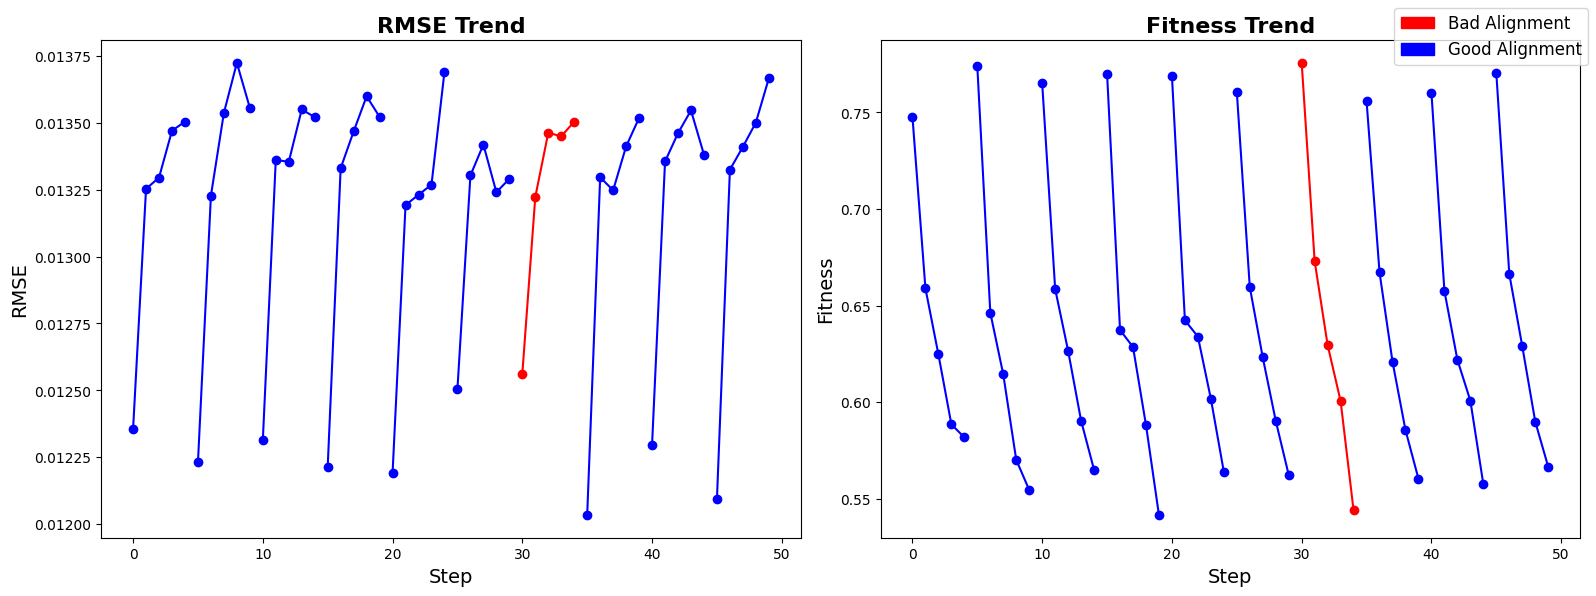

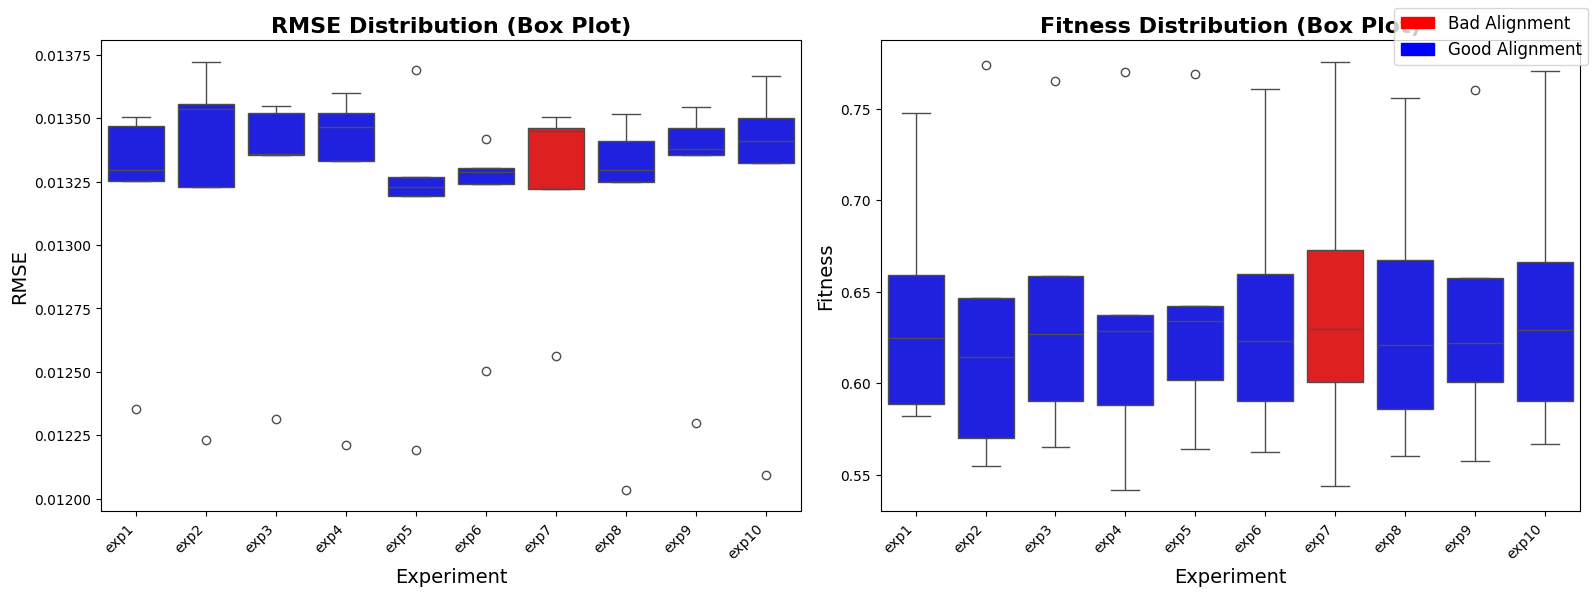

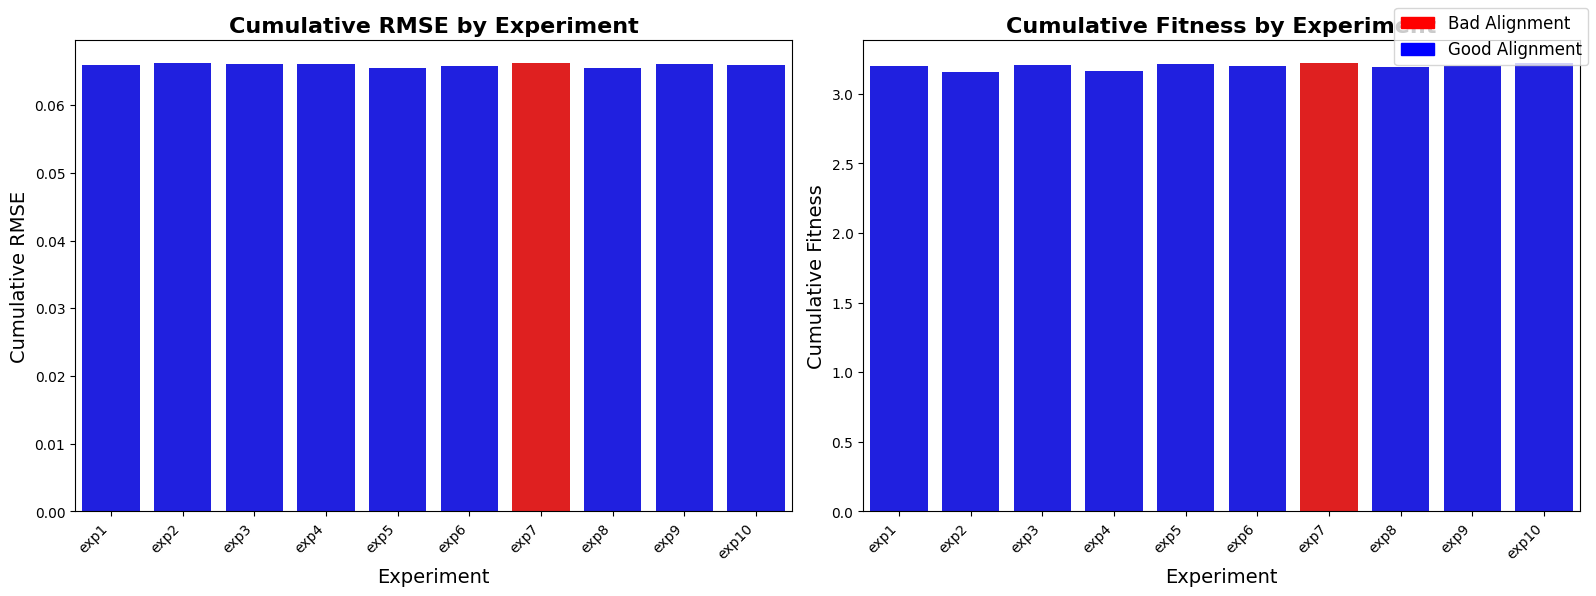

In [11]:
# Define the folder containing the experiment data
experiment_folder = "../results/real_sequence/alignment_by_camera_sequence1_camera1"

# Extract the data
df, experiments = extract_data(experiment_folder)

# Generate the scatter plots
plot_scatter(df, experiments)

# Generate the box plots
plot_box(df, experiments)

# Generate the bar plots
plot_bar(df, experiments)

In [20]:
import os
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

def build_and_train_classifiers(df):
    # Prepare the data
    X = df[["RMSE", "Fitness"]]
    y = df["Label"]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize classifiers
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(),
        "MLP": MLPClassifier()
    }

    # Train and evaluate each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"Classifier: {name}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
        print("-" * 30)

if __name__ == "__main__":
    folder = "../results/real_sequence/alignment_by_camera_sequence1_camera1"  # Replace with the path to your folder
    df, experiments = extract_data(folder)
    build_and_train_classifiers(df)

Classifier: Logistic Regression
Accuracy: 0.8
------------------------------
Classifier: Random Forest
Accuracy: 0.7
------------------------------
Classifier: SVM
Accuracy: 0.8
------------------------------
Classifier: MLP
Accuracy: 0.8
------------------------------


/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


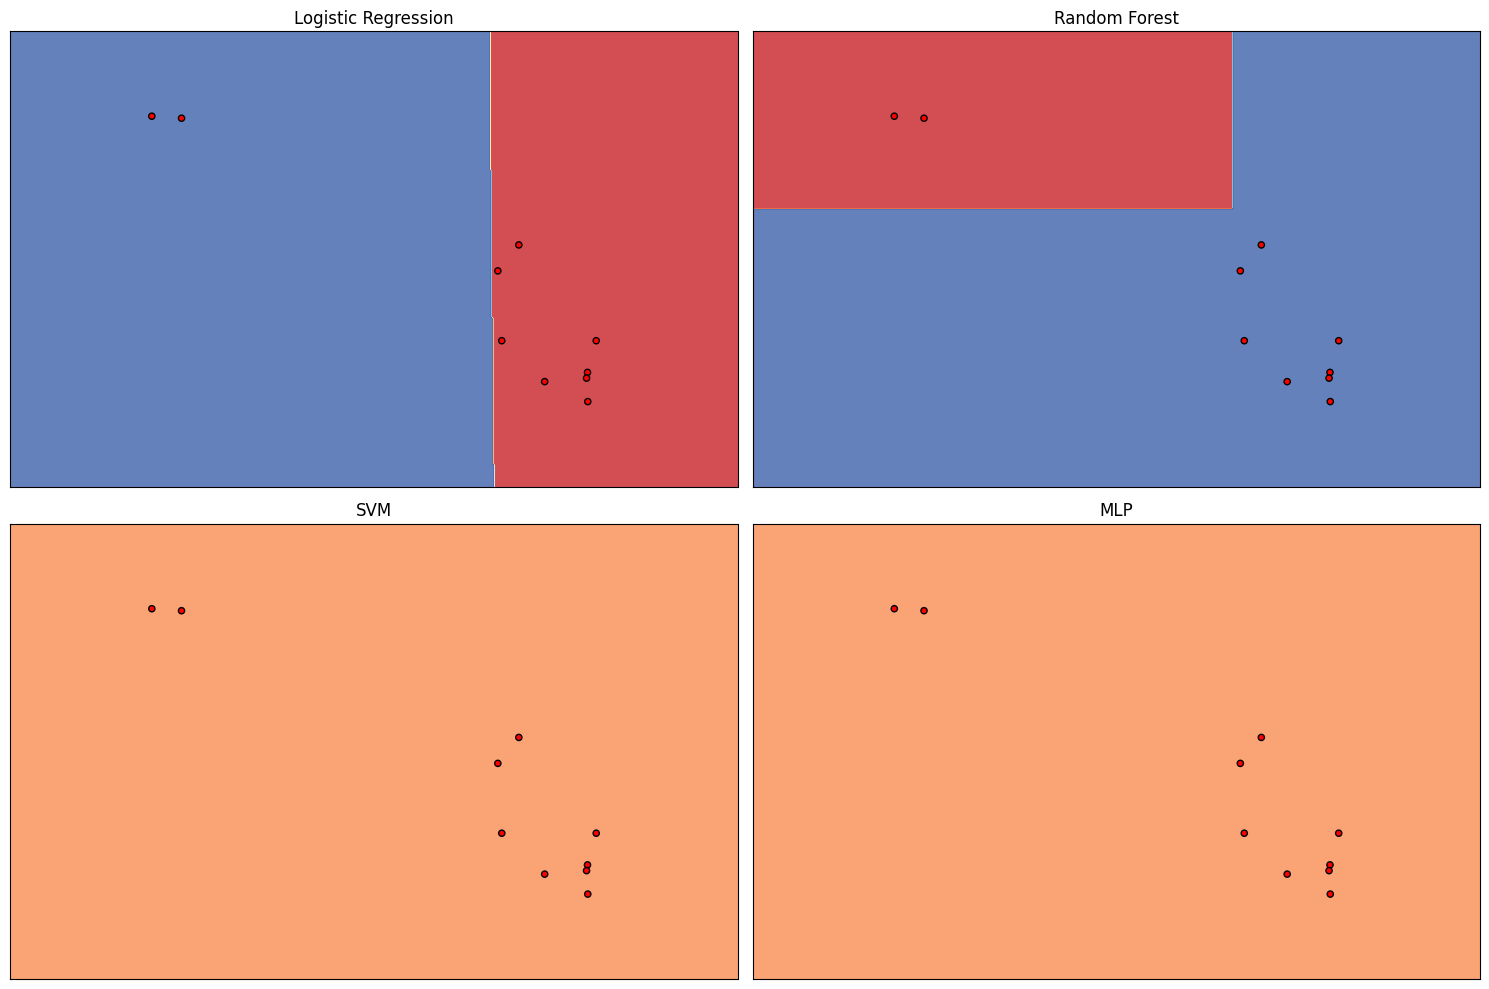

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, classifiers, scaler, X_real, y_real):
    # Define the mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Set up the figure
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    cm = plt.cm.RdYlBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    axes = axes.flatten()  # Flatten the 2x2 array of axes for easy iteration

    for ax, (name, clf) in zip(axes, classifiers.items()):
        # Plot the decision boundary by assigning a color to each point in the mesh
        Z = clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the real data points
        ax.scatter(X_real[:, 0], X_real[:, 1], c=y_real, cmap=cm_bright, edgecolors='k', s=20)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)

    # Hide any unused subplots
    for i in range(len(classifiers), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Prepare the data
X = df[["RMSE", "Fitness"]].values
y = df["Label"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier()
}

# Train the classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

# Plot the decision boundaries with real data points
plot_decision_boundaries(X_test, y_test, classifiers, scaler, X_test, y_test)

# Observation

- Temps de calcul **avec l'affichage** : environ 1 minute

- Temps de calcul **sans l'affichage** : environ 50 secondes

- Chaque fois qu'un alignement fail, il fail une première fois et après c'est irréparable, tout le reste devient n'importe quoi

# A faire

- essayer d'utiliser la pose pour crop le plus de bruit possible, background etc. 
- refaire des test pour voir si cela améliore le tout
- coder une version du pipeline complet et eventuellement le faire un .py 

- implémenter gedi dans le mmp fusion